In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

ideas
- predict ratings for watchlist entries
- could segment tv/movie and 2 separate models -> feature importance shows there's no need (could practice)
- add weight to recent ratings -> but most rates were rated last night
- bring in my favorite people √
- if the same title appears more than once, then I must have loved it √

In [2]:
checkin = 'CHECKINS190915.csv'
towatch = 'WATCHLIST190915.csv'
cdf = pd.read_csv(checkin, encoding='latin1')
wdf = pd.read_csv(towatch, encoding='latin1')
cdf.head()

,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Your Rating,Date Rated
0,1,tt1475582,2018-07-08,2018-07-08,NaN,Sherlock,https://www.imdb.com/title/tt1475582/,tvSeries,9.1,88.0,2010,"Crime, Drama, Mystery, Thriller",725768,2010-07-22,NaN,8.0,2019-09-16
1,2,tt0877057,2018-07-08,2018-07-08,NaN,Death Note: Desu nôto,https://www.imdb.com/title/tt0877057/,tvSeries,9.0,24.0,2006,"Animation, Crime, Drama, Fantasy, Mystery, Thr...",192663,2006-10-03,NaN,10.0,2019-09-16
2,3,tt0903747,2018-07-08,2018-07-08,NaN,Breaking Bad,https://www.imdb.com/title/tt0903747/,tvSeries,9.5,49.0,2008,"Crime, Drama, Thriller",1254784,2008-01-20,NaN,10.0,2019-09-16
3,4,tt0102926,2018-07-08,2018-07-08,NaN,The Silence of the Lambs,https://www.imdb.com/title/tt0102926/,movie,8.6,118.0,1991,"Crime, Drama, Thriller",1155769,1991-01-30,Jonathan Demme,7.0,2019-09-16
4,5,tt1877832,2018-07-08,2018-07-08,NaN,X-Men: Days of Future Past,https://www.imdb.com/title/tt1877832/,movie,8.0,132.0,2014,"Action, Adventure, Sci-Fi, Thriller",628820,2014-05-10,Bryan Singer,7.0,2019-09-16


In [3]:
wdf.head()

,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Your Rating,Date Rated
0,1,tt2802850,2014-06-14,2014-06-14,NaN,Fargo,https://www.imdb.com/title/tt2802850/,tvSeries,9.0,53.0,2014,"Crime, Drama, Thriller",281781.0,2014-04-15,NaN,NaN,NaN
1,2,tt3032476,2018-07-08,2018-07-08,NaN,Better Call Saul,https://www.imdb.com/title/tt3032476/,tvSeries,8.7,46.0,2015,"Crime, Drama",257384.0,2015-02-08,NaN,NaN,NaN
2,3,tt3216608,2018-07-08,2018-07-08,NaN,Dr. Ken,https://www.imdb.com/title/tt3216608/,tvSeries,5.6,21.0,2015,Comedy,3641.0,2015-10-02,NaN,NaN,NaN
3,4,tt5814060,2018-07-08,2018-07-08,NaN,The Nun,https://www.imdb.com/title/tt5814060/,movie,5.4,96.0,2018,"Horror, Mystery, Thriller",98248.0,2018-09-04,Corin Hardy,NaN,NaN
4,5,tt0475784,2018-07-08,2018-07-08,NaN,Westworld,https://www.imdb.com/title/tt0475784/,tvSeries,8.8,62.0,2016,"Drama, Mystery, Sci-Fi, Western",361070.0,2016-09-30,NaN,NaN,NaN


- cdf, wdf columns are the same, except from wdf my_rating is all nan
- equivalent to train-test split
- for the purpose of practice, could combine then split according to my_rating

In [4]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 17 columns):
Position          592 non-null int64
Const             592 non-null object
Created           592 non-null object
Modified          592 non-null object
Description       0 non-null float64
Title             592 non-null object
URL               592 non-null object
Title Type        592 non-null object
IMDb Rating       592 non-null float64
Runtime (mins)    589 non-null float64
Year              592 non-null int64
Genres            592 non-null object
Num Votes         592 non-null int64
Release Date      590 non-null object
Directors         506 non-null object
Your Rating       588 non-null float64
Date Rated        588 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 78.7+ KB


In [5]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 17 columns):
Position          91 non-null int64
Const             91 non-null object
Created           91 non-null object
Modified          91 non-null object
Description       0 non-null float64
Title             91 non-null object
URL               91 non-null object
Title Type        91 non-null object
IMDb Rating       86 non-null float64
Runtime (mins)    85 non-null float64
Year              91 non-null int64
Genres            91 non-null object
Num Votes         86 non-null float64
Release Date      90 non-null object
Directors         64 non-null object
Your Rating       2 non-null float64
Date Rated        2 non-null object
dtypes: float64(5), int64(2), object(10)
memory usage: 12.2+ KB


In [6]:
# combine
df = pd.concat([cdf, wdf], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 17 columns):
Position          683 non-null int64
Const             683 non-null object
Created           683 non-null object
Modified          683 non-null object
Description       0 non-null float64
Title             683 non-null object
URL               683 non-null object
Title Type        683 non-null object
IMDb Rating       678 non-null float64
Runtime (mins)    674 non-null float64
Year              683 non-null int64
Genres            683 non-null object
Num Votes         678 non-null float64
Release Date      680 non-null object
Directors         570 non-null object
Your Rating       590 non-null float64
Date Rated        590 non-null object
dtypes: float64(5), int64(2), object(10)
memory usage: 90.8+ KB


In [7]:
df.drop(['Description', 'URL'], axis=1, inplace=True)
df.columns = ['idx', 'imdb_id', 'creat_date', 'modify_date', 'title', 'type', 'imdb_rating', 'runtime', 'year', 
               'genre', 'votes', 'release_date', 'directors', 'my_rating', 'rate_date']

In [8]:
df.describe(include='all')

,idx,imdb_id,creat_date,modify_date,title,type,imdb_rating,runtime,year,genre,votes,release_date,directors,my_rating,rate_date
count,683.000000,683,683,683,683,683,678.000000,674.000000,683.000000,683,6.780000e+02,680,570,590.000000,590
unique,NaN,652,115,115,641,7,NaN,NaN,NaN,256,NaN,625,391,NaN,22
top,NaN,tt1727824,2018-07-08,2018-07-08,Hannibal,movie,NaN,NaN,NaN,Comedy,NaN,2018-10-23,Xavier Dolan,NaN,2019-09-16
freq,NaN,3,231,231,4,544,NaN,NaN,NaN,37,NaN,3,13,NaN,507
mean,263.124451,NaN,NaN,NaN,NaN,NaN,7.366077,115.336795,2005.428990,NaN,2.400098e+05,NaN,NaN,7.167797,NaN
std,180.832866,NaN,NaN,NaN,NaN,NaN,0.959197,228.603606,15.264496,NaN,2.933781e+05,NaN,NaN,1.184498,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,3.100000,5.000000,1920.000000,NaN,4.500000e+01,NaN,NaN,1.000000,NaN
25%,86.000000,NaN,NaN,NaN,NaN,NaN,6.800000,89.000000,2002.000000,NaN,3.217150e+04,NaN,NaN,6.000000,NaN
50%,251.000000,NaN,NaN,NaN,NaN,NaN,7.500000,104.000000,2011.000000,NaN,1.260130e+05,NaN,NaN,7.000000,NaN
75%,421.500000,NaN,NaN,NaN,NaN,NaN,8.100000,125.000000,2015.000000,NaN,3.569942e+05,NaN,NaN,8.000000,NaN


### clean

In [ ]:
# hard to pick out the categorical variables
# only type can be directly used
# genre needs to be pooled and separated for each work
# does creat_date == modify_date imply something? 
# year, my_rating are ordinal
# imdb_rating could generate imdb_rating_bin, then could compare with my_rating
# votes, runtime could be cut into bins, but any utility?

min                   5.000000
mean                115.336795
max                5220.000000
2th percentile       22.000000
25th percentile      89.000000
median              104.000000
75th percentile     125.000000
95th percentile     158.000000
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


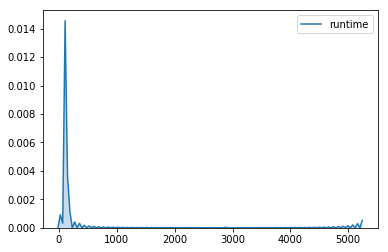

In [9]:
# check runtime distribution and impute
runtime_stats = {'min': df['runtime'].min(),
                 'mean': df['runtime'].mean(), 
                 'max': df['runtime'].max(),
                 '2th percentile': df['runtime'].quantile(0.02),
                 '25th percentile': df['runtime'].quantile(0.25),
                 'median': df['runtime'].quantile(0.50),
                 '75th percentile': df['runtime'].quantile(0.75),
                 '95th percentile': df['runtime'].quantile(0.95)}    # 呃這個description裡有了
print(pd.Series(runtime_stats))
sns.kdeplot(df['runtime'], shade=True)

In [10]:
# check the record with abnormally long runtime: the notorious "The Cure for Insomnia"
df[df['runtime'] == max(df['runtime'])]

,idx,imdb_id,creat_date,modify_date,title,type,imdb_rating,runtime,year,genre,votes,release_date,directors,my_rating,rate_date
643,52,tt0284020,2018-07-18,2018-07-18,The Cure for Insomnia,movie,5.1,5220.0,1987,"Documentary, Music",340.0,1987-01-31,John Henry Timmis IV,NaN,NaN


In [11]:
df['type'].value_counts()

movie           544
tvSeries        109
tvMovie          11
video             6
tvSpecial         5
short             4
tvMiniSeries      4
Name: type, dtype: int64

In [12]:
for t in ['tvMovie', 'video', 'tvSpecial', 'short', 'tvMiniSeries']:
    print(t, df.loc[df['type'] == t, 'title'].tolist())
    print('\n')

# could combine after checking. mostly comedy specials which are similar to movies.

tvMovie ['The Normal Heart', 'Tour de Pharmacy', '7 Days in Hell', 'Fargo', 'Mulholland Dr.', 'Lavalantula', 'Begi!', 'Python Night: 30 Years of Monty Python', 'Monty Python: The Meaning of Live', 'Made in Britain', 'Rasputin']


video ['Doggie Heaven', 'Indochine: College Boy', 'Dylan Moran: What It Is', 'Dylan Moran: Like, Totally', 'Dylan Moran: Monster', 'What About Dick?']


tvSpecial ['John Mulaney: New in Town', 'John Mulaney: The Comeback Kid', 'John Mulaney: Kid Gorgeous at Radio City', 'Dylan Moran: Off the Hook', "Monty Python's Flying Circus: Live at Aspen"]


short ['The Russian Sleep Experiment', 'Breakfast Wine', 'Tell It to the Fishes', 'The Crimson Permanent Assurance']


tvMiniSeries ['War & Peace', 'Remember Me', 'A Very English Scandal', 'Good Omens']




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


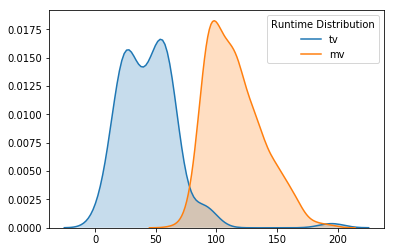

In [13]:
# plot runtime distribution (excluding outliers)
# didn't merge all types together because those entries would diffuse the distributions for a little bit
# and i want to impute missing runtime with mean
tv = df[df['type'] == 'tvSeries']
mv = df[df['type'] == 'movie']
ax_tv = sns.kdeplot(tv.loc[abs(tv['runtime'] - tv.runtime.mean()) < 3 * tv.runtime.std(), 'runtime'], shade=True)
ax_mv = sns.kdeplot(mv.loc[abs(mv['runtime'] - mv.runtime.mean()) < 3 * mv.runtime.std(), 'runtime'], shade=True)
plt.legend(title='Runtime Distribution', loc='upper right', labels=['tv', 'mv'])

In [14]:
tv_adjusted_mean = tv.loc[abs(tv['runtime'] - tv.runtime.mean()) < 3 * tv.runtime.std(), 'runtime'].mean()
mv_adjusted_mean = mv.loc[abs(mv['runtime'] - mv.runtime.mean()) < 3 * mv.runtime.std(), 'runtime'].mean()
print('tv_adjusted_mean: {:.2f}, mv_adjusted_mean: {:.2f}'.format(tv_adjusted_mean, mv_adjusted_mean))

tv_adjusted_mean: 44.14, mv_adjusted_mean: 115.18


In [15]:
# fillna with different means accoridng to type
df.loc[(df['type'] == 'tvSeries') & (df['runtime'].isna()), 'runtime'] = tv_adjusted_mean
df.loc[(df['type'] == 'movie') & (df['runtime'].isna()), 'runtime'] = mv_adjusted_mean
df['runtime'].isna().value_counts()

False    683
Name: runtime, dtype: int64

In [16]:
# directors
df.loc[df['directors'].isnull(), 'type'].value_counts()

tvSeries        109
tvMiniSeries      4
Name: type, dtype: int64

In [17]:
# all series are w/o directors, safe to merge different types
df.loc[df['type'].isin(['tvMovie', 'video', 'tvSpecial', 'short']), 'type'] = 'movie'
df.loc[df['type'].isin(['tvMiniSeries', 'tvSeries']), 'type'] = 'tv'
df['type'].value_counts()

movie    570
tv       113
Name: type, dtype: int64

In [18]:
# year ? release_date
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year    # float

In [19]:
df['release_year'].isnull().value_counts()

False    680
True       3
Name: release_year, dtype: int64

In [20]:
df['release_year'] = df['release_year'].fillna(-1).astype(int)
print(df[df['year'] == df['release_year']].shape[0], df[df['year'] != df['release_year']].shape[0])

679 4


In [21]:
df[df['year'] != df['release_year']]
# safe to assume they represent basically the same thing

,idx,imdb_id,creat_date,modify_date,title,type,imdb_rating,runtime,year,genre,votes,release_date,directors,my_rating,rate_date,release_year
7,8,tt0898266,2018-07-08,2018-07-08,The Big Bang Theory,tv,8.1,22.0,2007,"Comedy, Romance",662664.0,2006-05-01,NaN,7.0,2019-09-16,2006
11,12,tt1231460,2018-07-08,2018-07-08,Late Night with Jimmy Fallon,tv,6.9,60.0,2009,"Comedy, Music, Talk-Show",11975.0,NaT,NaN,7.0,2019-09-16,-1
426,427,tt1583937,2019-01-21,2019-01-21,Dylan Moran: What It Is,movie,8.2,77.0,2009,"Documentary, Comedy",752.0,NaT,Randall Churchill,7.0,2019-09-16,-1
637,46,tt0342707,2018-07-16,2018-07-16,The Longest Most Meaningless Movie in the World,movie,5.4,2880.0,1970,"Documentary, Drama, History",169.0,NaT,Vincent Patouillard,NaN,NaN,-1


In [22]:
# creat_date ? modify_date
print(df[df['creat_date'] == df['modify_date']].shape[0], df[df['creat_date'] != df['modify_date']].shape[0])

683 0


In [23]:
df.drop(['modify_date', 'release_date', 'release_year'], axis=1, inplace=True)

In [24]:
# real_rate means i rated it right after viewing, instead of bulk-filling-in afterwards
# although bulk-filing-in might reserve a more consistant judging criteria
# real_rating signals that the film is either very good or very bad
df['real_rate'] = None
df.loc[df['creat_date'] == df['rate_date'], 'real_rate'] = 1
df.loc[(~df['rate_date'].isnull()) & (df['creat_date'] != df['rate_date']), 'real_rate'] = 0
df['real_rate'].value_counts()

0    567
1     23
Name: real_rate, dtype: int64

In [ ]:
# then how to deal with create_date, rate_date?

In [25]:
# genre
genres = set()
for _, row in df.iterrows():
    glist = row['genre'].split(',')
    glist = [g.strip() for g in glist]
    genres = genres.union(set(glist))
genres = list(genres)
genres.sort()
print(len(genres), genres)

25 ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']


In [26]:
# there are maybe too many genres, but considering the problem genre could be very important as features
# so one-hot
for g in genres:
    df[g] = 0
for i, row in df.iterrows():
    glist = row['genre'].split(',')
    glist = [g.strip() for g in glist]
    for g in glist:
        df.at[i, g]= 1

In [27]:
df.iloc[0]

idx                                          1
imdb_id                              tt1475582
creat_date                          2018-07-08
title                                 Sherlock
type                                        tv
imdb_rating                                9.1
runtime                                     88
year                                      2010
genre          Crime, Drama, Mystery, Thriller
votes                                   725768
directors                                  NaN
my_rating                                    8
rate_date                           2019-09-16
real_rate                                    0
Action                                       0
Adventure                                    0
Animation                                    0
Biography                                    0
Comedy                                       0
Crime                                        1
Documentary                                  0
Drama        

In [28]:
# rate_date to delta from now
# intuition is smilar to real_rate
df['delta'] = pd.to_datetime('now') - pd.to_datetime(df['rate_date'])
print(df['delta'].head())
df['delta'] = df['delta']/np.timedelta64(1, 'h')
print(df['delta'].head())

0   1 days 23:49:57.516362
1   1 days 23:49:57.516362
2   1 days 23:49:57.516362
3   1 days 23:49:57.516362
4   1 days 23:49:57.516362
Name: delta, dtype: timedelta64[ns]
0    47.832643
1    47.832643
2    47.832643
3    47.832643
4    47.832643
Name: delta, dtype: float64


In [29]:
# keep a reference for film titles, discard in model input
indexdf = df[['idx', 'imdb_id', 'title']].copy()

In [30]:
# drop useless and noisy columns to produce model input
df.drop(['imdb_id', 'creat_date', 'title', 'genre', 'rate_date'], axis=1, inplace=True)
df.columns

Index(['idx', 'type', 'imdb_rating', 'runtime', 'year', 'votes', 'directors',
       'my_rating', 'real_rate', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western', 'delta'],
      dtype='object')

### observe

Text(0.5,0.98,'Proportion of TV vs Movie')

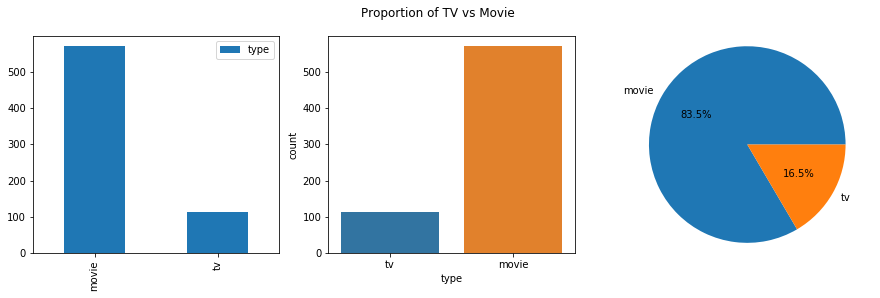

In [31]:
# type, genre
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(15,4))

ax1 = df.type.value_counts().to_frame().plot(kind='bar', ax=ax1)

ax2 = sns.countplot(x='type', data=df, ax=ax2)

labels = df.type.value_counts().keys().tolist()
sizes = df.type.value_counts().tolist()
ax3.pie(sizes, labels=labels, autopct='%1.1f%%')
ax3.axis('equal')

plt.suptitle('Proportion of TV vs Movie')

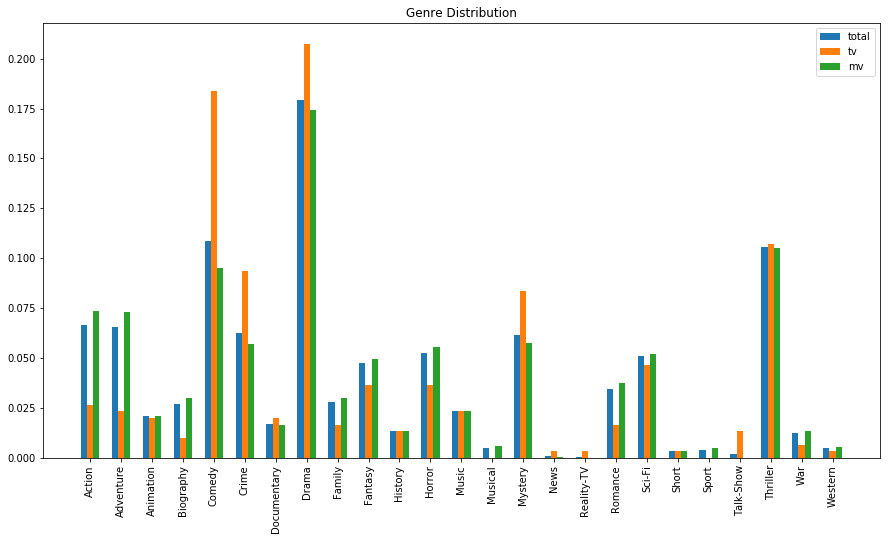

In [32]:
genre_counts = []
tv_genre_counts = []
mv_genre_counts = []
for g in genres:
    genre_counts.append(df[df[g] == 1].shape[0])
    tv_genre_counts.append(df[(df[g] == 1) & (df['type'] == 'tv')].shape[0])
    mv_genre_counts.append(df[(df[g] == 1) & (df['type'] == 'movie')].shape[0])
    
# pd.DataFrame(list(zip(genres, genre_counts)), columns=['genre', 'count']).set_index('genre').plot(kind='bar')
indices = np.arange(len(genres))
width = 0.2

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.bar(indices-width, [c/sum(genre_counts) for c in genre_counts], width, label='total')
ax.bar(indices,[c/sum(tv_genre_counts) for c in tv_genre_counts], width, label='tv')
ax.bar(indices+width,[c/sum(mv_genre_counts) for c in mv_genre_counts], width, label='mv')

ax.set_xticks(np.arange(len(genres)))
ax.axes.set_xticklabels(genres, rotation=90)

plt.title('Genre Distribution')
plt.legend()
plt.show()

# all, tv, movie are all normalized to represent the proprotions of each genre
# i watch a lot more tv in comedy/crime/drama/mystery
# and a lot more movie in action/biography/fantasy/horror/romance (surprisingly)
# you can also find out that the themes of tv shows are generally more mundane than those of movies

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5,0.98,'Overall Rating')

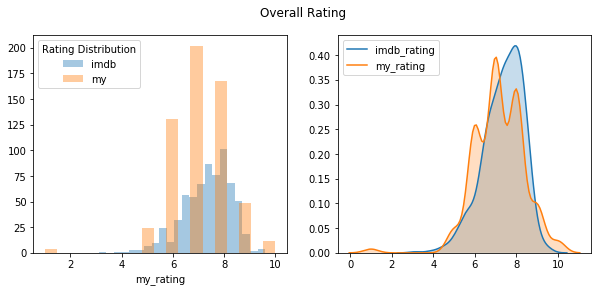

In [51]:
# imdb_rating, my_rating
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 4))
ax_imdb = sns.distplot(df.loc[~df['imdb_rating'].isnull(), 'imdb_rating'], kde=False, ax=ax1)
ax_my = sns.distplot(df.loc[~df['my_rating'].isnull(), 'my_rating'], kde=False, ax=ax1)
ax1.legend(title='Rating Distribution', loc='upper left', labels=['imdb', 'my'])

sns.kdeplot(df['imdb_rating'], shade=True, ax=ax2)
sns.kdeplot(df['my_rating'], shade=True, ax=ax2)
plt.suptitle('Overall Rating')

# my ratings are slightly lower than "average" imdb ratings
# especially reflected by the bar with my_rating = 1
# which means i am more picky about those popular films

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Library/Frameworks/Python.framework/Versions/3.6/lib/pyth

Text(0.5,0.98,'Rating by Genre')

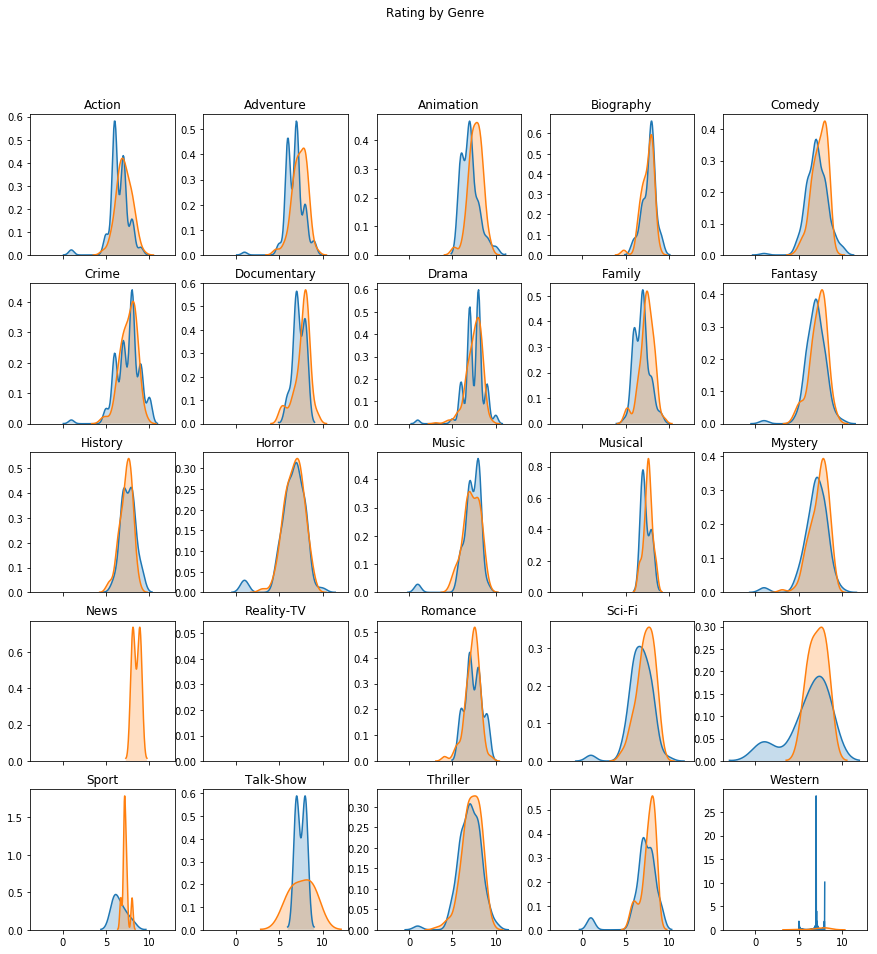

In [52]:
# my_rating, genre
fig, axes = plt.subplots(5, 5, figsize=(15, 15), sharex=True)
for i, g in enumerate(genres):
#     axes[i//5][i%5].boxplot(df.loc[df[g] == 1, 'my_rating'])
    sns.kdeplot(df.loc[df[g] == 1, 'my_rating'], shade=True, ax=axes[i//5][i%5])
    sns.kdeplot(df.loc[df[g] == 1, 'imdb_rating'], shade=True, ax=axes[i//5][i%5])
    axes[i//5][i%5].set_title(g)
    axes[i//5][i%5].legend().set_visible(False)
plt.suptitle('Rating by Genre')

# zooming into each genre, the picky trend is confirmed
# but i'm quite easily satisfied with biography/crime/history/music/romance/thriller
# this might be interpreted in two ways:
#     1. i love the genre so that i love everything within it (biography/crime/music/thriller)
#     2. i don't have enough domain knowledge to be picky about the genre, which in turn reflects that i don't like it that much (history/romance)

In [43]:
# problem of western w/ proba > 1\
# maybe not enough data
# https://stats.stackexchange.com/questions/4220/can-a-probability-distribution-value-exceeding-1-be-ok
# sns.kdeplot(df.loc[df['Western']==1, 'my_rating'], shade=True)

Text(0.5,1,'Release Year Distribution')

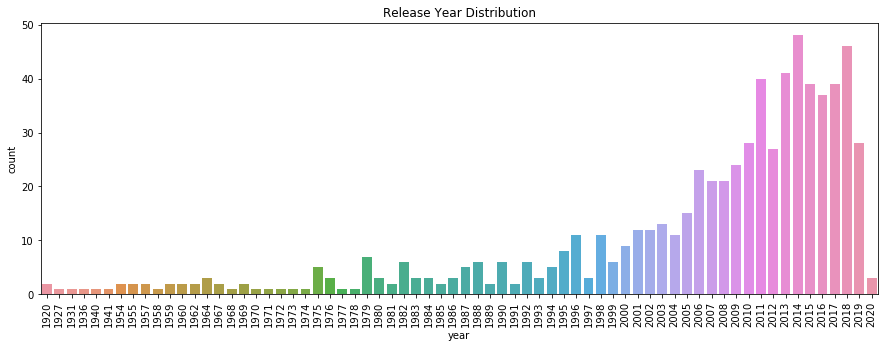

In [53]:
# year, runtime
fig = plt.figure(figsize=(15, 5))
sns.countplot('year', data=df)
plt.xticks(rotation=90)
plt.title('Release Year Distribution')

# need to watch more olde and classic films

In [60]:
# fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(15, 10))
# ax1 = sns.boxplot(x='year', y='runtime', data=tv[abs(tv['runtime'] - tv.runtime.mean()) < 3 * tv.runtime.std()], ax=ax1)
# ax2 = sns.boxplot(x='year', y='runtime', data=mv[abs(mv['runtime'] - mv.runtime.mean()) < 3 * mv.runtime.std()], ax=ax2)
# ax1.set_title('Movie Runtime over Year')
# ax2.set_title('TV Runtime Change over Year')
# plt.xticks(rotation=90)
# don't think it's good viz

In [105]:

df[abs(df['runtime'] - df.runtime.mean()) < 3 * df.runtime.std()][['type', 'year', 'runtime']].groupby(['type', 'year']).mean().unstack().reset_index()
# MultiIndex(levels=[['runtime'], [1920, 1927, 1931, 1936, 1940, 1941, 1954, 1955, 1957, 1958, 1959, 1960, 1962, 1964, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]],
#            labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]],
#            names=[None, 'year'])

type runtime                                                       \
year           1920   1927  1931  1936   1940   1941   1954  1955   1957   
0     movie    76.0  153.0  87.0  87.0  129.0  119.0  108.5  76.0  128.5   
1        tv     NaN    NaN   NaN   NaN    NaN    NaN    NaN  25.0    NaN   

        ...                                                                  \
year    ...            2011        2012        2013        2014        2015   
0       ...      111.344828  118.871708  109.517241  117.543015  111.233333   
1       ...       48.558442   42.600000   41.166667   47.888889   31.888889   

                                                                 
year        2016        2017        2018        2019       2020  
0     108.333333  109.200000  115.372093  122.139798  115.17757  
1      84.600000   49.777778  100.000000   58.750000        NaN  

[2 rows x 68 columns]

In [106]:
runtime_year = df[abs(df['runtime'] - df.runtime.mean()) < 3 * df.runtime.std()][['type', 'year', 'runtime']].groupby(['type', 'year']).mean().unstack().reset_index()
runtime_year.columns = runtime_year.columns.droplevel()
runtime_year = runtime_year.transpose()
runtime_year.columns = ['movie', 'tv']
runtime_year.reset_index(inplace=True)
runtime_year.drop(0, inplace=True)
runtime_year

,year,movie,tv
1,1920,76,NaN
2,1927,153,NaN
3,1931,87,NaN
4,1936,87,NaN
5,1940,129,NaN
6,1941,119,NaN
7,1954,108.5,NaN
8,1955,76,25
9,1957,128.5,NaN
10,1958,128,NaN


Text(0.5,1,'Runtime Change through Years')

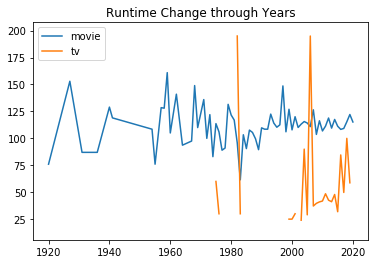

In [110]:
plt.plot('year', 'movie', data=runtime_year, label='movie')
plt.plot('year', 'tv', data=runtime_year, label='tv')
plt.legend()
plt.title('Runtime Change through Years')

# i plotted this just out of curiousity
# expected to see huge increase in runtime for recent years, which i despise (eg. avengers - end game)
# but turned out that's not the case
# could be i don't have enough data to plot a smooth curve

### features

In [112]:
df.describe(include='all')

# surprised and glad to see Xavier Dolan as my top director

,idx,type,imdb_rating,runtime,year,votes,directors,my_rating,real_rate,Action,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,delta
count,683.000000,683,678.000000,683.000000,683.000000,6.780000e+02,570,590.000000,590.0,683.000000,...,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,590.000000
unique,NaN,2,NaN,NaN,NaN,NaN,391,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,movie,NaN,NaN,NaN,NaN,Xavier Dolan,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,570,NaN,NaN,NaN,NaN,13,NaN,567.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,263.124451,NaN,7.366077,115.126689,2005.428990,2.400098e+05,NaN,7.167797,NaN,0.190337,...,0.001464,0.098097,0.146413,0.010249,0.011713,0.005857,0.301611,0.035139,0.014641,1332.605525
std,180.832866,NaN,0.959197,227.122842,15.264496,2.933781e+05,NaN,1.184498,NaN,0.392854,...,0.038264,0.297663,0.353779,0.100791,0.107670,0.076359,0.459293,0.184266,0.120200,3264.393198
min,1.000000,NaN,3.100000,5.000000,1920.000000,4.500000e+01,NaN,1.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.832643
25%,86.000000,NaN,6.800000,89.000000,2002.000000,3.217150e+04,NaN,6.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.832643
50%,251.000000,NaN,7.500000,105.000000,2011.000000,1.260130e+05,NaN,7.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.832643
75%,421.500000,NaN,8.100000,125.000000,2015.000000,3.569942e+05,NaN,8.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,47.832643


In [132]:
# bring in my favorite people
# get all directors appeared in the dataset
directors = set()
for i, row in df[~df['directors'].isnull()].iterrows():
    if ',' in row['directors']:        
        dlist = row['directors'].split(',')
        dlist = [d.strip() for d in dlist]
        directors.union(set(dlist))
    else:
        directors.add(row['directors'])
directors = list(directors)
directors.sort()
pprint(directors)
print(len(directors))

['Abdellatif Kechiche',
 'Adam Bhala Lough',
 'Adam McKay',
 'Adam Robitel',
 'Adam Wingard',
 'Adrian Lyne',
 'Afonso Poyart',
 'Agnieszka Holland',
 'Akiva Schaffer',
 'Alan Clarke',
 'Alan Parker',
 'Alejandro G. Iñárritu',
 'Alex Garland',
 'Alex Kurtzman',
 'Alex Timbers',
 'Alfonso Cuarón',
 'Alfred Hitchcock',
 'Andrei Tarkovsky',
 'Andrew Stanton',
 'Andrey Volgin',
 'Andy Muschietti',
 'Ang Lee',
 'Angelina Jolie',
 'Anna Shapiro',
 'Anthony Hickox',
 'Anthony Minghella',
 'Anton Corbijn',
 'Ari Aster',
 'Armando Iannucci',
 'Ash Avildsen',
 'Ava DuVernay',
 'Barry Sonnenfeld',
 'Bart Layton',
 'Baz Luhrmann',
 'Benedict Andrews',
 'Benny Chan',
 'Bent Hamer',
 'Bernardo Bertolucci',
 'Boaz Yakin',
 'Brad Bird',
 'Brad Furman',
 'Brett Ratner',
 'Brian De Palma',
 'Brian Helgeland',
 'Brian Levant',
 'Bruce Robinson',
 'Bryan Singer',
 'Catherine Hardwicke',
 'Chad Stahelski',
 'Charles Binamé',
 'Charles Chaplin',
 'Charlie Kaufman',
 'Chris Columbus',
 'Christopher Nolan',
 

In [133]:
# favorite people actually came from imdb mobile exclusive "favorite people" list
# i wasn't able to export it to do the intersection, so i just picked my favorite directors from the pool
# add as a binary feature
fav_ppl = set(['Alfred Hitchcock', 'Andrei Tarkovsky', 'David Lynch', 'Dexter Fletcher', 'Edgar Wright', 'Fritz Lang', 'Guy Ritchie', 
           'Lars von Trier', 'Leigh Whannell', 'Quentin Tarantino', 'Ricky Gervais', 'Ron Howard', 'Ryan Murphy', 'Stanley Kubrick',
           'Terry Gilliam', 'Terry Jones', 'Tim Burton', 'Wes Anderson', 'Woody Allen', 'Xavier Dolan', 'Yorgos Lanthimos'])
df['fav_ppl'] = 0

for i, row in df[~df['directors'].isnull()].iterrows():
    if ',' in row['directors']:        
        dlist = row['directors'].split(',')
        dlist = [d.strip() for d in dlist]
        for d in dlist:
            if d in fav_ppl:
                df.at[i, 'fav_ppl'] = 1
    else:
        if row['directors'] in fav_ppl:
            df.at[i, 'fav_ppl'] = 1
df.fav_ppl.value_counts()

0    599
1     84
Name: fav_ppl, dtype: int64

In [145]:
# titles watched more than once
# add as binary feature
indexdf['dup'] = indexdf[['imdb_id', 'title']].duplicated()
dup = indexdf.loc[indexdf['dup'] == True, ['idx', 'title']]
pprint(sorted(list(set(dup.title))))

['A Fish Called Wanda',
 'Black Mirror',
 'Bohemian Rhapsody',
 'Das Cabinet des Dr. Caligari',
 'Detachment',
 'Elephant Song',
 'Full Metal Jacket',
 'Hannibal',
 'Harry Potter and the Deathly Hallows: Part 2',
 'Hugo',
 'Inglourious Basterds',
 "J'ai tué ma mère",
 "Jacob's Ladder",
 'Juste la fin du monde',
 'Kingsman: The Secret Service',
 'Laurence Anyways',
 'Les amours imaginaires',
 'Life of Brian',
 'Mommy',
 'Peep Show',
 'Reservoir Dogs',
 'Stalker',
 'Succession',
 'Taboo',
 'The Boy in the Striped Pyjamas',
 'The Great Gatsby',
 'Tom à la ferme',
 'We Need to Talk About Kevin',
 'X-Men: Apocalypse']


In [147]:
df['one_plus'] = 0
df.loc[df['idx'].isin(dup['idx'].tolist()), 'one_plus'] = 1
df['one_plus'].value_counts()

0    650
1     33
Name: one_plus, dtype: int64

In [159]:
# drop raw text column
df.drop('directors', axis=1, inplace=True)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 36 columns):
idx            683 non-null int64
type           683 non-null object
imdb_rating    678 non-null float64
runtime        683 non-null float64
year           683 non-null int64
votes          678 non-null float64
my_rating      590 non-null float64
real_rate      590 non-null object
Action         683 non-null int64
Adventure      683 non-null int64
Animation      683 non-null int64
Biography      683 non-null int64
Comedy         683 non-null int64
Crime          683 non-null int64
Documentary    683 non-null int64
Drama          683 non-null int64
Family         683 non-null int64
Fantasy        683 non-null int64
History        683 non-null int64
Horror         683 non-null int64
Music          683 non-null int64
Musical        683 non-null int64
Mystery        683 non-null int64
News           683 non-null int64
Reality-TV     683 non-null int64
Romance        683 non-null int64
S

In [158]:
wdf[wdf['Position'].isin(df.loc[df['imdb_rating'].isnull(), 'idx'].tolist())]
# movies that are not yet in theater don't have ratings and votes
# these should be in test set anyway

,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Your Rating,Date Rated
31,32,tt1620981,2018-07-09,2018-07-09,NaN,The Addams Family,https://www.imdb.com/title/tt1620981/,movie,NaN,NaN,2019,"Animation, Comedy, Family, Fantasy, Horror",NaN,2019-10-09,"Conrad Vernon, Greg Tiernan",NaN,NaN
69,70,tt4682266,2019-05-09,2019-05-09,NaN,The New Mutants,https://www.imdb.com/title/tt4682266/,movie,NaN,NaN,2020,"Action, Horror, Sci-Fi",NaN,2020-04-01,Josh Boone,NaN,NaN
72,73,tt9684220,2019-06-22,2019-06-22,NaN,Bad Trip,https://www.imdb.com/title/tt9684220/,movie,NaN,NaN,2020,Comedy,NaN,2020-02-28,Kitao Sakurai,NaN,NaN
82,83,tt5606664,2019-07-17,2019-07-17,NaN,Doctor Sleep,https://www.imdb.com/title/tt5606664/,movie,NaN,NaN,2019,Horror,NaN,2019-10-30,Mike Flanagan,NaN,NaN
85,86,tt1745960,2019-08-03,2019-08-03,NaN,Top Gun: Maverick,https://www.imdb.com/title/tt1745960/,movie,NaN,NaN,2020,"Action, Drama",NaN,2020-06-24,Joseph Kosinski,NaN,NaN


In [176]:
df['type'] = df['type'].astype('category').cat.codes

In [ ]:
# i should have reserve the imdb_id for later when i need to merge result with titles
# the reference of idx is not correct because concatenating wdf and cdf 
# but... i was too lazy to do this

### modeling

In [ ]:
# todo: change target variable my_rating to categorical
# regression -> multilable classification

In [223]:
# train_test_split
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(df.drop('my_rating', axis=1), df['my_rating'])
# do it in a non-conventional way because the train/test data points can be clearly identified by null value in ratings
iv = df.columns.tolist()
iv.remove('my_rating')
iv.remove('idx')
x_train = df.loc[~df['my_rating'].isnull(), iv].values
x_test = df.loc[df['my_rating'].isnull(), iv].values
y_train = df.loc[~df['my_rating'].isnull(), 'my_rating'].values
y_test = df.loc[df['my_rating'].isnull(), 'my_rating'].values
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(590, 34) (93, 34) (590,) (93,)


In [224]:
x_test = np.nan_to_num(x_test.astype(float))
x_test

array([[  0. ,   6.4, 103. , ...,   0. ,   0. ,   1. ],
       [  0. ,   6.2, 102. , ...,   0. ,   0. ,   0. ],
       [  1. ,   8.1,  90. , ...,   0. ,   0. ,   0. ],
       ...,
       [  0. ,   7. , 118. , ...,   0. ,   0. ,   0. ],
       [  0. ,   7.2,  83. , ...,   0. ,   0. ,   0. ],
       [  1. ,   8.4,  55. , ...,   0. ,   0. ,   0. ]])

In [226]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# choose random forest regressor due to interpretability
# grid search to find the best performing param combination first
grid = GridSearchCV(RandomForestRegressor(), 
                    param_grid={'n_estimators': [10, 50, 100],
                                'max_depth': [5, 10, 20, 50, 100]}, 
                    cv=5)
grid.fit(x_train, y_train)
print(grid.cv_results_)
print(grid.best_params_, grid.best_score_)

# as there are too few data points the performance is not stable
# best params always change
# i chose the most "overfitting" one to at least fit the training data better (?)

{'mean_fit_time': array([0.01473441, 0.04891806, 0.10260258, 0.01496596, 0.07917051,
       0.13763556, 0.01597919, 0.07619977, 0.15398889, 0.01635108,
       0.07776527, 0.1522625 , 0.01584501, 0.07700863, 0.15426555]), 'std_fit_time': array([0.00342067, 0.0016871 , 0.00565535, 0.00042867, 0.00796492,
       0.00241562, 0.00030287, 0.00128278, 0.00133007, 0.00045461,
       0.00279053, 0.00321241, 0.00019842, 0.00203297, 0.00329401]), 'mean_score_time': array([0.00120864, 0.00263929, 0.00501986, 0.00123425, 0.00378742,
       0.00524001, 0.00102987, 0.00296783, 0.00538516, 0.00104938,
       0.00298553, 0.00562625, 0.00105839, 0.00299134, 0.00571184]), 'std_score_time': array([3.06032795e-04, 4.18281599e-05, 3.03359678e-04, 2.52060894e-04,
       1.30737557e-03, 1.47413064e-04, 4.22663357e-05, 2.18597465e-05,
       8.20597820e-05, 1.84829611e-05, 6.83052211e-05, 5.14272697e-04,
       6.87035145e-05, 4.92523621e-05, 7.78247654e-04]), 'param_max_depth': masked_array(data=[5, 5, 5, 10,

In [227]:
# cross validation split from train set
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error',]
rgrs = RandomForestRegressor(n_estimators=100, max_depth=100)
scores = cross_validate(rgrs, x_train, y_train, scoring=scoring, cv=5)

for k in sorted(scores.keys()):
    print('{:_<30}'.format(k), scores[k])
    
# can observe that the model is able to overfit the training data
# i've done some comparison of different param combinations, as it's pretty fast to fit with this small data scale
# the validation performance doesn't change too much

fit_time______________________ [0.16971302 0.16011596 0.17515707 0.16398883 0.16206884]
score_time____________________ [0.01556683 0.01622415 0.02137375 0.01620889 0.01603603]
test_neg_mean_absolute_error__ [-0.77084746 -0.69822034 -0.82194915 -0.7359322  -0.66991525]
test_neg_mean_squared_error___ [-0.92368644 -0.72426695 -1.21780085 -0.90582881 -1.10407203]
test_r2_______________________ [0.34928358 0.227345   0.25146078 0.31645565 0.2422939 ]
train_neg_mean_absolute_error_ [-0.25737288 -0.26951271 -0.26686441 -0.26788136 -0.28016949]
train_neg_mean_squared_error__ [-0.12801186 -0.13732818 -0.1274072  -0.13258263 -0.13122161]
train_r2______________________ [0.90597472 0.90726882 0.90508705 0.90644675 0.90535949]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_mean_absolute_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_mean_squared_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_r2'), which will not be available by default any more in 0.21. If you need training scores, please set return

In [228]:
# use full training set to fit the model and predict
rgrs_full = RandomForestRegressor(n_estimators=50, max_depth=10)
rgrs_full.fit(x_train, y_train)
preds = rgrs_full.predict(x_test)

Talk-Show      0.000000
Reality-TV     0.000000
News           0.000299
Western        0.000302
Musical        0.000819
type           0.001269
Documentary    0.001278
Sport          0.001465
History        0.001590
Animation      0.001938
real_rate      0.002515
one_plus       0.003295
Family         0.003379
Biography      0.005984
Romance        0.006223
War            0.006724
Short          0.007143
Comedy         0.009021
Music          0.009644
Sci-Fi         0.011405
Horror         0.011705
Thriller       0.012161
Fantasy        0.013995
Crime          0.015745
fav_ppl        0.016528
Mystery        0.018755
Adventure      0.022051
Action         0.030678
Drama          0.036223
delta          0.090968
runtime        0.107298
year           0.112521
votes          0.118462
imdb_rating    0.318615
dtype: float64


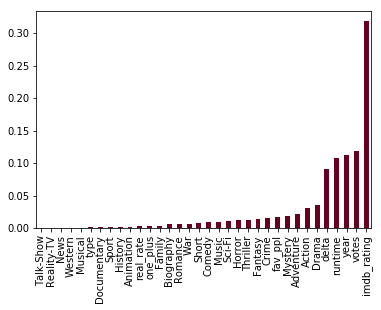

In [229]:
fi = pd.Series(rgrs_full.feature_importances_, index=iv).sort_values()
print(fi)
fi.plot.bar(cmap='RdBu')

# imdb_rate, votes are two most suggestive features intuitively
# i didn't remove these two features because 
# although it might be highly correlated to the target variable
# they are actually not direct indicators of the target value
# because i did not make the decisions based on other people's rating
# unfortunately real_rate and one_plus didn't make much difference

In [250]:
# merge the preds with titles and save to file
x_test_df = df.loc[df['my_rating'].isnull(), iv]
x_test_df['preds'] = list(preds)
res = pd.merge(indexdf, x_test_df, left_index=True, right_index=True)
res.sort_values(by='preds', inplace=True)
res.to_csv('RESULT190917.csv', index=False)

In [251]:
res = pd.read_csv('RESULT190917.csv')
res[['title', 'preds']]

# i'd say the predictions are actually not bad
# it's partially due to that all these entries are from my watchlist 
# and i should prefer to watch them rather than other films so that i will give them pretty high ratings
# but it did rank joker as the top film which is the most anticipated one by me
# and dune/the purge/new mutant are those i only want to casually watch, just for the fame of director/novelty/fun

,title,preds
0,The New Mutants,3.772000
1,Jacob's Ladder,3.800000
2,The Addams Family,4.012000
3,Doctor Sleep,4.155333
4,Top Gun: Maverick,4.160000
5,Bad Trip,4.292000
6,The Twilight Zone,4.805049
7,The Fanatic,5.030000
8,Gotti,5.639645
9,The Cure for Insomnia,5.835556


In [ ]:
# TODO:
#     transform problem to multiclass prediction
# also one thing to clarify: didn't do imputation after split because there's not really to much to impute (only runtime)
# for runtime, imputed with different means intuitively, which i think is appropriate